Q1

a. Zero Frequency Filtering is a  technique that emphasizes abrupt changes in a signal's baseline by differentiating the signal
and filtering it to highlight rapid transitions or events.
It is commonly used in applications like speech processing to detect and locate significant sound events within an audio signal making it valuable for event detection and feature extraction in various signal processing domains.
It is one of the technique whick is useful for epoch detection as there is significant excitation is present near the epoch location.



b.Time Scale Modification  means speeding up or slowing down a sound without affecting the frequency content, such as the perceived pitch of any tonal components.

Q2

In [24]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
s, fs = sf.read("q2_audio.wav")
x=s
fs

22050

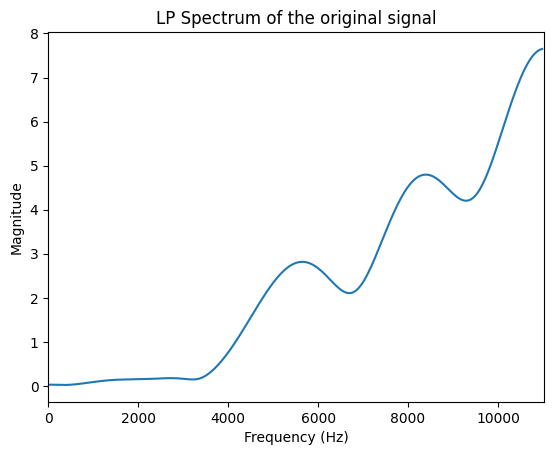

In [41]:
##Q2_a
# LPC order
order = 10
# Calculate the LPC coefficients
lp_coefficients = librosa.lpc(x, order=order)

# Compute the LP spectrum using the LPC coefficients
lp_spectrum = np.fft.fft(lp_coefficients, 512)

# Calculate the corresponding frequencies
freq = np.fft.fftfreq(512, 1 / fs)

plt.plot(freq[:256], np.abs(lp_spectrum[:256]))

plt.title("LP Spectrum of the original signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 11025)  # Adjust the x-axis limits as needed
plt.title("LP Spectrum of the original signal")

plt.show()







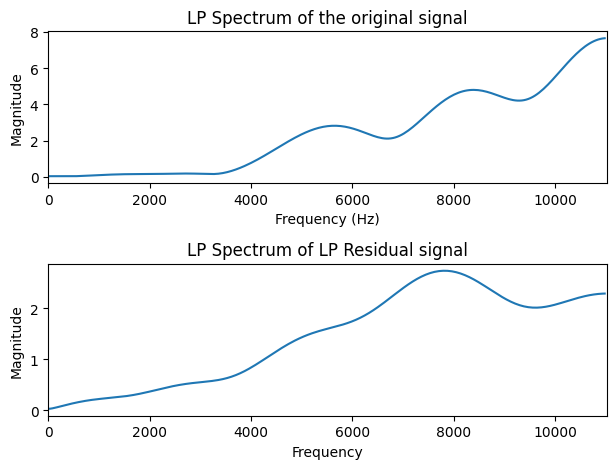

In [39]:

lp_coefficients = librosa.lpc(x, order=order)

# Plot the LP spectrum of the original signal
plt.subplot(2,1,1)
plt.plot(freq[:256], np.abs(lp_spectrum[:256]))

plt.title("LP Spectrum of the original signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 11025)  # Adjust the x-axis limits as needed
plt.title("LP Spectrum of the original signal")

# Calculate the LP residual signal
error_signal = x - np.convolve(lp_coefficients, x, mode='same')

# Calculate the LPC coefficients for the LP residual
lp_error= librosa.lpc(np.abs(error_signal), order=order)

# Compute the LP spectrum for the LP residual
lp_spectrum2 = np.fft.fft(lp_error, 512)

# Plot the LP spectrum of the LP residual signal
plt.subplot(2,1,2)
plt.plot(freq[:256], np.abs(lp_spectrum2[:256]))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim(0, 11025)  # Adjust the x-axis limits as needed
plt.title("LP Spectrum of LP Residual signal")

plt.tight_layout()
plt.show()



Q3

22050

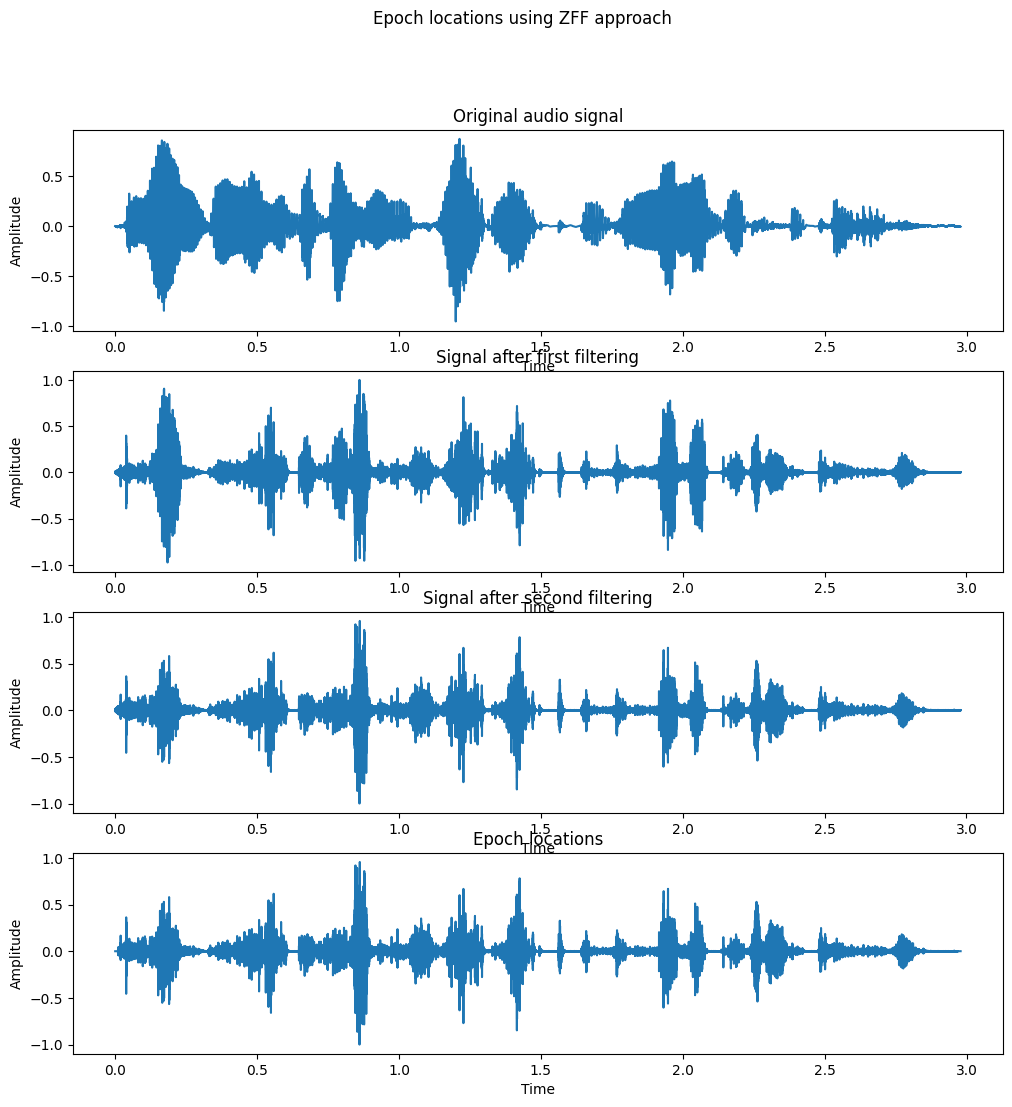

In [18]:


# Compute time values
time = np.arange(0, len(s)) / fs

# Plot the original audio signal
plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.plot(time, s)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original audio signal")

# Computing x[n]
n = len(s)
x = np.zeros(n)

for k in range(1, n):
    x[k] = s[k] - s[k - 1]

b = 1
a = [1, -2, 1]

# Computing y1[n] (first differentiator)
y1 = np.convolve(x, b, mode='full')
y1 = np.convolve(y1, a, mode='full')
y1 = y1 / np.max(np.abs(y1))
time = np.arange(0, len(y1)) / fs

plt.subplot(412)
plt.plot(time, y1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal after first filtering")

# Computing y2[n] (second differentiator)
y2 = np.convolve(y1, b, mode='full')
y2 = np.convolve(y2, a, mode='full')
y2 = y2 / np.max(np.abs(y2))
time = np.arange(0, len(y2)) / fs

plt.subplot(413)
plt.plot(time, y2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal after second filtering")

# Removing trend
#  sf is 22050 so in each 10 miliseconds there will be 220 samples so N=220
N = 220
tsum = np.sum(y2[:2 * N + 1])
y = np.zeros(n)

for k in range(220, n):
    if k +220 > n-1:
        y[k] = y[k - 1]
    else:
        y[k] = y2[k] - (tsum / 441)
        tsum = tsum - y2[k - 219] + y2[k + 220]

# Mean subtraction
tsum = np.sum(y[:2 * N + 1])
yf = np.zeros(n)

for k in range(220, n):
    if k + 220 > n-1:
        yf[k] = yf[k - 1]
    else:
        yf[k] = y[k] - (tsum / 441)
        tsum = tsum - y[k - 219] + y[k + 220]

      

yf = yf / np.max(np.abs(yf))
time = np.arange(0, len(yf)) / fs

plt.subplot(414)
plt.plot(time, yf)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Epoch locations")

plt.suptitle("Epoch locations using ZFF approach")
plt.show()


Q4